In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dataframe = pd.read_csv("petrol_consumption.csv")
dataframe.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
dataframe.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


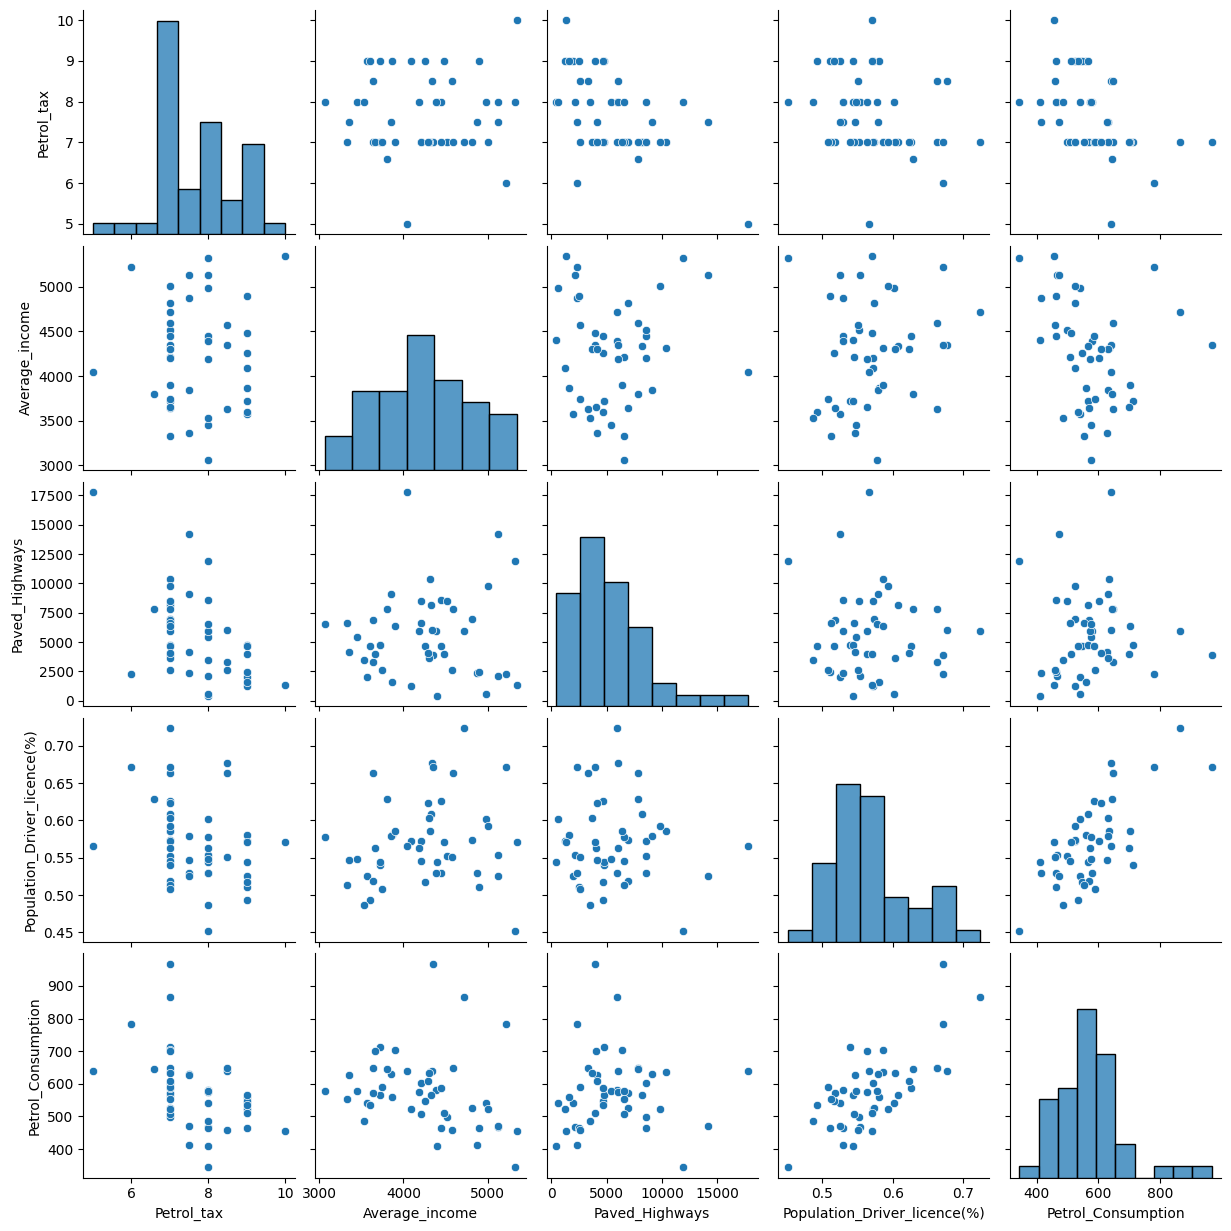

In [4]:
sb.pairplot(dataframe)

In [5]:
correlation = dataframe.corr()
correlation

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot: >

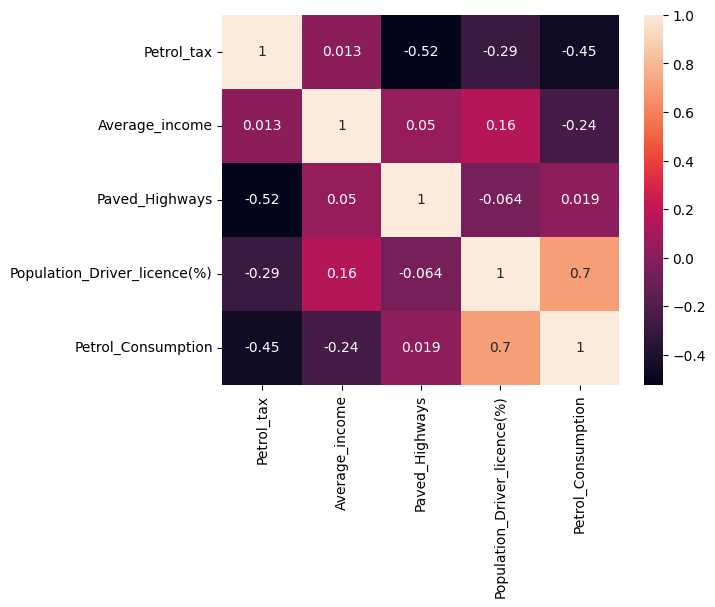

In [6]:
sb.heatmap(correlation, annot=True)

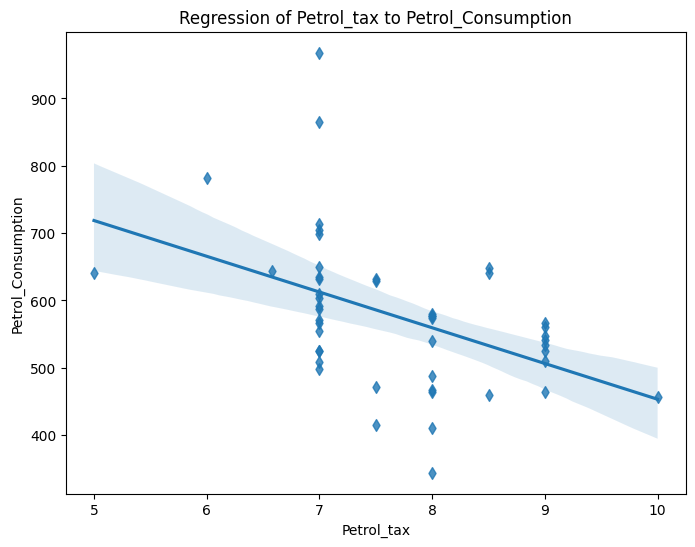

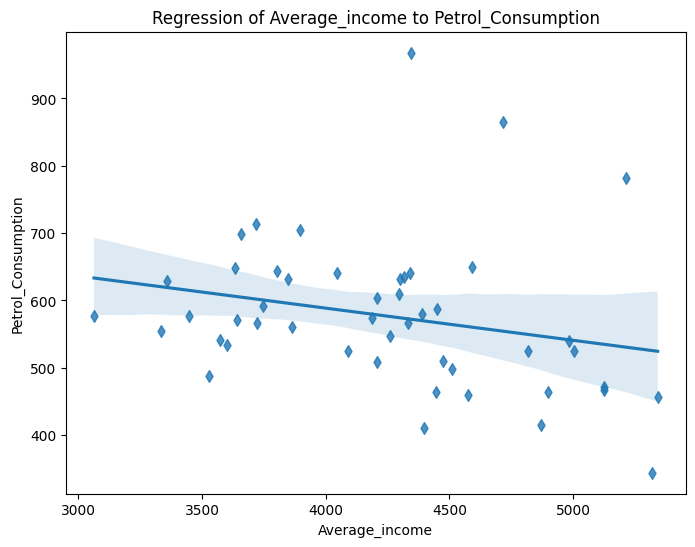

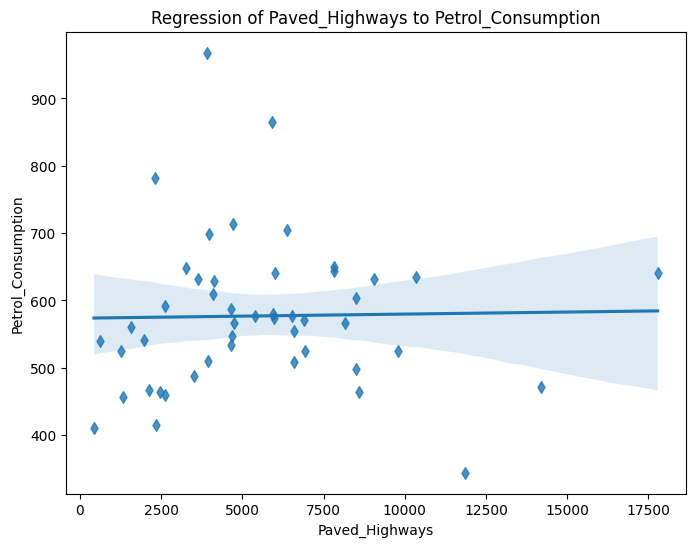

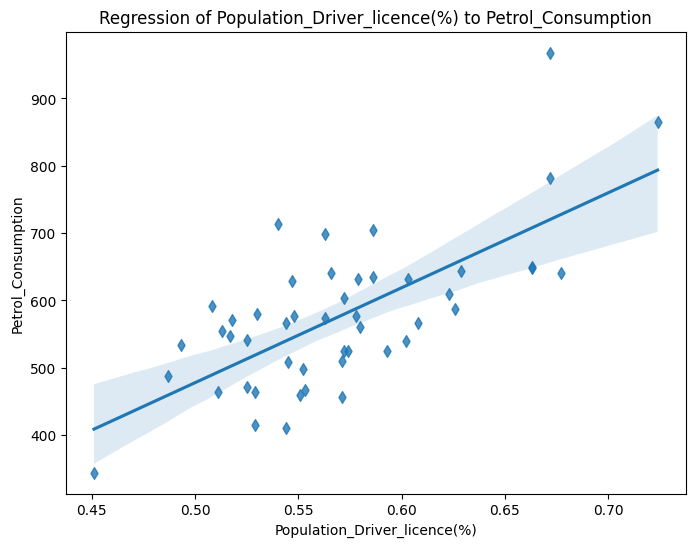

In [7]:
variables = ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y="Petrol_Consumption", data=dataframe, marker = "d").set(title=f"Regression of {var} to Petrol_Consumption")

In [8]:
X = dataframe[["Average_income", "Population_Driver_licence(%)"]]
y = dataframe["Petrol_Consumption"]

In [9]:
X.shape

(48, 2)

In [10]:
SEED = 48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [11]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [12]:
print(f"Beta_0: {LinReg.intercept_}, Beta_n: {LinReg.coef_}")

Beta_0: -59.417300016263994, Beta_n: [-6.39302637e-02  1.60942906e+03]


In [13]:
print(f"train_score: {LinReg.score(X_train, y_train)}")

train_score: 0.6363976023931577


In [14]:
print(f"test_score: {LinReg.score(X_test, y_test)}")

test_score: 0.2685288206551123


In [15]:
y_pred = LinReg.predict(X_test)
compare = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
compare

,y_test,y_pred
45,510,573.414830
3,414,480.630286
1,524,599.573481
14,566,642.169663
37,704,634.571889
40,587,663.659545
9,498,540.534189
11,471,457.826422
19,640,752.644896
24,460,534.961083


In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 67.12
Mean squared error: 5096.19
Root mean squared error: 71.39


**Without Petrol_tax and Paved_Highways the model score got worse and deviatian between trained and predicted got bigger. Better to leave the data intact.**